## Confidence Intervals

Objectives: 

- Explain the purpose of confidence intervals and identify applications for their use
- Explain the implications of the central limit theorem in inferential statistics
- Demonstrate how to build a confidence interval around a sample estimate
- Report margin of error and visualize graphically a confidence interval to communicate the precision of sample estimates to a non-technical audience
- Explain the concepts of statistical estimate, precision, and standard error in regards to inferential statistics


#Objective - Explain the purpose of confidence intervals and identify applications for their use

#What are confidence intervals?  Why make them?

In the past two units, we've talked about two different hypothesis tests: the t-test for a population mean(s) and the chi-square test for the relationship between two categorical variables.

When we reject the null hypothesis for a one-independent-sample t-test, we say we believe that the population mean is *not* equal to some reference value (recall that the null hypothesis is that the population mean *is* equal to a reference value).  

***However, rejecting the null hypothesis only gives us a clue to what we think the population mean is not.***


**The purpose of a confidence interval for a one-sample t-test is to allow us to draw conclusions about the true value of the population mean.**


Note that there are some analagous procedures for confidence intervals for chi-square tests and two-independent-sample t-tests, but we are going to focus on a confidence interval for a single population mean here.

#Informal Confidence Intervals in Daily Life

Believe it or not, you already use the concept of a confidence interval all the time in your daily life.


*   "How long will it take the brownies to bake?"  About 35 - 40 minutes.
*   "How many cookies should I bake for the bake sale?"  Probably around 2 - 3 dozen.
*   "How many loaves of bread will the bakery sell today?" Around 90 - 100.

The true answer to all of these questions is unknowable ahead of time.  Exactly how long it will take the brownies to bake probably depends on a number of factors including how well your oven is working, how hot and humid it is, the age of the eggs you use, etc.

However, based on personal experience - and perhaps the recipe - we can be very confident that it will take between 35 - 40 minutes for the brownies to be done.  

Estimates in the other two scenarios work similarly.

#Objective - Demonstrate how to build a confidence interval around a sample estimate

# The Anatomy of a Confidence Interval

Here comes the math part!

When we make brownies, we make an informal confidence interval for how long it will take for them to bake based on the recipe and our baking knowledge.

**When we make a confidence interval for a population mean, we will use information from our sample and mathematical properties of the t-distribution.**

##The formula for a confidence interval for a population mean is 

###$\bar{X}$  $\pm$  $t^* \frac{s}{\sqrt{n}}$ 



Where $\bar{X}$ is the sample **mean**, s is the sample **standard deviation** and n is the sample **size**.

Note that $\frac{s}{\sqrt{n}}$ is the **standard error**, which is an estimate of the true standard deviation of the sample mean.  

Another name for the quantitiy $t^* \frac{s}{\sqrt{n}}$ is the **margin of error**. 

Nearly all of the information we need to estimate the population mean using a confidence interval comes from our sample.  The only thing we don't get from the sample is ***$t^*$***.

Now is the time to introduce some data.

# Estimate the mean healthy adult human body temperature.

Everyone knows that 98.60 F (37.00 C) is the normal human body temperature.  But is that actually correct, and – come to think of it – how does everyone know that in the first place?

A German physician named Carl Reinhold August Wunderlich is generally credited with originating this idea, which was based on – reportedly – more than one million axiliary temperature readings taken from 25,000 subjects and was published in his 1868 book Das Verhalten der Eigenwärme in Krankheiten (which translates to The Behavior of the Self-Warmth in Diseases). But was he correct? History tells that his thermometer was a foot long and took 20 minutes to determine a subject’s temperature. For a measure that is used so often to determine general health, it would be a good idea to use modern instruments to confirm or refute his results.

In 1992, three physicians from the University of Maryland School of Medicine set out to do just that, measuring body temperatures for 223 healthy men and women aged 18-40 one to four times a day for three consecutive days using an electronic digital thermometer. The mean body temperature was computed for each individual, and this summary measure is recorded in the Bodytemp.csv dataset. 

**We wish to estimate the population mean healthy human body temperature.**

Source: Mackowiak, P. A., Wasserman, S. S., and Levine, M. M.  (1992), "A Critical Appraisal of 98.6 Degrees F, the Upper Limit of the Normal Body Temperature, and Other Legacies of Carl Reinhold August Wunderlich," Journal of the American Medical Association_, 268, 1578-1580.


In [1]:
import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Bodytemp.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(df.shape)
df.head()


(223, 2)


ID  Body_temp
0   36       96.7
1  254       96.9
2  282       97.0
3  286       97.0
4  302       97.0

The two variables in the dataset are participant ID and body temperature measured in degrees F.

We can use the mean, sd and row counting functions in Python to calculate and save the sample mean body temp ($\bar{X}$ for the CI formula), the sample standard deviation (s in the CI formula) and the sample size (n in the formula).

In [2]:
#Calculate mean

mean_body = df['Body_temp'].mean()
print(mean_body)

98.16502242152464


In [3]:
#Calculate SD

std_body = df['Body_temp'].std()
print(std_body)

0.5273047859946364


In [5]:
#Calculate n

n = df.shape[0]
print(n)

223


We can calculate the standard error of the sample mean by dividing the sd of the sample by the square root of the sample size.

In [6]:
#Calculate SE

sterr_body = std_body / n**0.5
print(sterr_body)

0.035310940220425246


Let's plug these quantities into the CI formula.  We're almost there!

###$\bar{X}$  $\pm$  $t^* \frac{s}{\sqrt{n}}$ 

98.17 $\pm$ $t^* \frac{0.53}{\sqrt{223}}$

98.17 $\pm$ $t^* * 0.035$ 

So what is t*????? ***The critical score***

Let's look carefully at what the CI equation is saying.

We are going to use our sample mean as the starting point for estimating the population mean.  That seems like a good idea.

Then we are going to add and subtract some number of standard errors from the sample mean to get the range of values that will be our confidence interval.

t* is the number that tells us how many **standard errors** to add and subtract from the sample mean in the CI formula.

How do we calculate t*?

# Objective - Explain the implications of the Central Limit Theorem in inferential statistics

#A Brief Digression Into the Central Limit Thoerem

The Central Limit Theorem (or CLT) tell us that, as long as the sample size is big enough (about 30-40), the distribution of the sample mean is Normal with a mean equal to the population mean and a standard deviation equal to $\frac{\sigma}{\sqrt{n}}$ .

How do we know this?  Take a graduate level statistics class to find out!  Just kidding, but only kind of.  It has to do with limit calculus and is beyond the scope of what we are doing right now.

Because we are actually estimating two population parameters (both the population mean and the population standard deviation) we need to amend the CLT statement above a tiny bit.

As long as the sample size is big enough (about 40), the distribution of the sample mean has a **t-distribution** with a mean equal to the population mean, a standard deviation equal to $\frac{s}{\sqrt{n}}$, and n-1 degrees of freedom.

Let's look at a picture:


![alt text](https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/T-dist%201.png)


In fact, **the CLT tells us to expect 95% of sample means to be within about 1.97 standard errors of the population mean.**

The reason that we say "about" 2 is that the exact number of standard errors we need to add and subtract to be 95% confident about the population mean will depend on our sample size in the form of the degrees of freedom (___________ - 1).  We will talk about DOF later.

The CLT allows us to be a little bit more specific about our confidence interval formula.

We can now say that:

"We are 95% confident that the true population mean falls between about 2SEs below the sample mean and about 2SEs above the sample mean."

**We have to use Python to get the exact value of t* for the CI formula.**

In [14]:
from scipy.stats import t

#Don't worry too much about where the 0.975 comes from.  It has to do
#with wanting to determine the *middle* 95% of the t-distribution
#We're going to learn
#how to calculate a 95% CI this easy way in just a minute.

#Recall that n = 223 for the body temp problem.
t_star = t.ppf(0.975,df=223-1)

#t_star = (1-t.cdf(0.025, df=223-1)) - (1-t.cdf(-0.025, df=223-1))
print(t_star)

1.9707073953190277


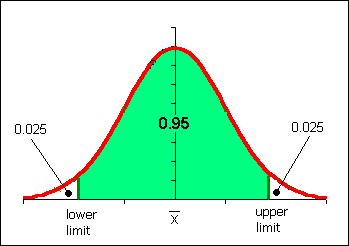

#Back to body temperature!

We left off in the body temperature example with:

A confidence interval of 

98.17 $\pm$ $t^* * 0.035$ 

We know from the CLT that t* should be somewhere around 2 for a 95% confidence interval.

And further, using Python, we know that t* for a 95% confidence interval for the body temperature data = 1.97 (quick check - this is very close to 2).

98.17 $\pm$ 1.97 * 0.035

The margin of error = 1.97 * 0.035 = 0.07.



In [9]:
#recall that we calculated mean_bodytem etc. above.

#Calculate the lower confidence limit

low = mean_body - t_star * sterr_body
print(low)

98.09543489049658


In [10]:
#Calculate the upper confidence limit

high = mean_body + t_star * sterr_body
print(high)

98.2346099525527


In conclusion, we are 95% confident that the population mean healthy human body temperature is between 98.09 and 98.23

#Want to see how to do this the easy way?

In [23]:
#We can use the t.interval funtion to calculate the CI.
#We set the loc parameter equal to the mean and the
#scale parameter equal to the SE
#Alpha = 0.95 means we want a 95% CI

#Calculate your t-interval here.
interval = t.interval(alpha=.90, df=n-1, loc=mean_body, scale=sterr_body)
print(interval)

interval = t.interval(alpha=.95, df=n-1, loc=mean_body, scale=sterr_body)
print(interval)

interval = t.interval(alpha=.99, df=n-1, loc=mean_body, scale=sterr_body)
print(interval)

(98.106697704594, 98.22334713845528)
(98.09543489049658, 98.2346099525527)
(98.0732790800297, 98.25676576301957)


Note that we get exactly the same answer as we got working by hand.

#Objective - Explain the concepts of statistical estimate, precision and standard error in regards to inferential statistics

#But I want to be X% confident!

Because the confidence level is determined by t* and that's just a number, you can use any confidence level you want.  However, most commonly, we choose to be 90%, 95% or 99% confident.

We can tune the confidence level by changing the alpha parameter in the CI funtion.

#But I want to be 100% confident!

Let's take a very, very close look at the confidence intervals above.  This is subtle - out in the 100ths place of the decimals.

The 90% confidence interval is the *narrowest* - it includes the smallest range of values - and the 99% confidence interval is the *widest* - it includes the widest range of values.

Confidence intervals are a trade-off between accuracy and precision.

**The more confident you want to be, the less precise your CI will be.**

**The less confident you are willing to be, the more precise your estimate can be.**

At the point we were 100% confident, our CI would probably be meaningless.

### In terms of brownies:

*   We are 90% confident the brownies will be done in 35 - 36 minutes.
*   We are 95% confident the brownies will be done in 34 - 37 minutes.
*   We are 99% confident the brownies will be done in 33 - 39 minutes.
*   We are 100% confident the brownies will be done in 0 - 60 minutes.

The 100% confidence interval is true... but not very helpful.


###Accuracy vs. precision

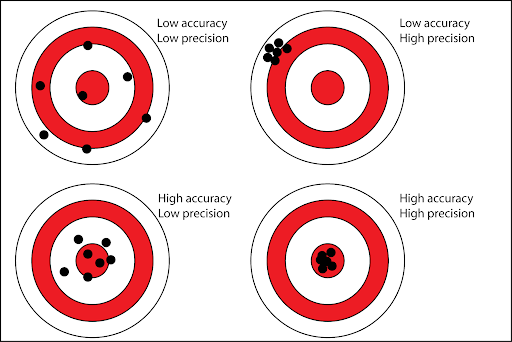

#Common Errors with the Interpretation of Confidence Intervals.

**Correct statement:** We are 95% confident that the population mean healthy human body temperature is between 98.10 and 98.23 degrees F.

**Incorrect statement:** We are 95% confident that the sample mean healthy human body temperature is between 98.10 and 98.23 degrees F.


*  We know our sample mean, we're looking to infer confidence intervals of the larger population


**Incorrect statement:** We are 95% confident that the sample mean healthy human body temperature is 98.17 degrees F.

*   Measure the lower and upper limit for the possible population mean

**Incorrect statement:** 95% of samples will have a mean that is between 98.10 and 98.23 degrees F.

*   ???????? 95% of samples from a population with an actual population mean equal to our observed sample mean will fall between 98.10 and 98.23 (if the sample size is enough to represent its actual distribution)

#Objective - Report the margin of error and visualize graphically a confidence interval to communicate the precision of sample estimates to a non-technical audience

## It can help to look at a picture

We expect 95% of all 95% CIs to contain the true population mean.  

That means, if we took 20 random samples from the same population, they'd all be different, but we'd expect 19/20 to contain the true population mean and only 1/20 not to contain the true population mean.

![alt text](https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/CI%20image.png)


#The correspondence between confidence intervals and hypothesis tests.

If you believe that a C% confidence interval contains the true population mean, and the mean under the null hypothesis does not appear in the confidence interval, you can reject Ho at the alpha (1 - .C) level.

Note: This only works for two-sided confidence intervals paired with two-sided hypothesis tests (the only kind we are discussing in class).

We are 95% confident that the population mean healthy human body temperature is between 98.10 and 98.23 degrees F.

Therefore, we can conclude that we would reject the null hypothesis that the mean healthy human body temperature is 98.6 degrees F at the alpha = 0.05 level.


#Confidence intervals and sample size

If we increased the sample size from 223 to 500 but the sample mean and SD remained the same, describe two ways the margin of error would change. Would the margin of error become smaller or larger?

In [28]:
from scipy.stats import t

#New Sample Size
# We assumed perfect precision
n=500

#Larger size => Smaller Margin of Error

t_star = t.ppf(0.975,df=n-1)
print("Critical Value:", t_star)


sterr_body = std_body/(n**(1/2))

print("Lower:", mean_body - (t_star * sterr_body))
print("Upper:", mean_body + (t_star * sterr_body))

ME = t_star*sterr_body
print('Margin of Error =', ME)

Critical Value: 1.9647293909876649
Lower: 98.11869059165736
Upper: 98.21135425139192
Margin of Error = 0.04633182986728856


The margin of error becomes smaller.  You get a more precise estimate with the same level of confidence.

#Statistical Power and Error

95% confidence... 0.05 significance level... this is making me think there's a chance we could make the wrong decision with our hypothesis test...


###Yep.

There are four things that can happen when we conduct a hypothesis test:

|          |                   |     Truth    |              |   |
|:--------:|:-----------------:|:------------:|--------------|---|
|          |                   |  Ho is true  |  Ha is true  |   |
| Decision |     Reject Ho     | ???????      |    ???????   |   |
|          | Fail to reject Ho |    ???????   | ????????     |   |

A ________ error occurs when you _______ the null hypothesis but it is really ___________.  The chance of making a type 1 error = __________ level.

A _______ error occurs when you ________ the null hypothesis when the __________ is really true.  This is hard to calculate because it relies on a lot of assumptions about what's really going on if the alternative hypothesis is really true.

When we suspect we are making a type 2 error, we say we are ____________ to reject the null hypothesis.

Statistical power is the ___________________.

There are several factors that influence statistical power:

1. Sample size.  ___________ sample size = more statistical power
2. Alpha level.  ____________ alpha level = more statistical power
3. Effect size.  ____________ = more statistical power

#P-hacking

aka - the problem of ___________

___________ is the practice of doing a bunch of hypothesis tests or creating a bunch of confidence intervals until you find one that is ___________

The problem is that - just by chance - we expect to ___________ the null hypothesis ___________ about ___________ of the time.  

eg: If you do ___________ hypothesis tests, you can expect ___________ to be statistically significant just by chance.

Always lay out your hypotheses before you start working with your data and - if you want to make multiple comparisons - make sure to adjust for that with your significance level.


## Let's do one more quick example.

Use the Titanic dataset to create a 95% confidence interval for the population mean age of all Western Europeans traveling the US in the early 1900s (assume the Titanic passengers are representative of this population).

In [ ]:
import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Titanic.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(df.shape)
df.head()

(887, 8)


Survived  Pclass  ... Parents/Children_Aboard     Fare
0         0       3  ...                       0   7.2500
1         1       1  ...                       0  71.2833
2         1       3  ...                       0   7.9250
3         1       1  ...                       0  53.1000
4         0       3  ...                       0   8.0500

[5 rows x 8 columns]

In [ ]:
#calculate mean, sd, n, se here.

In [ ]:
#Calculate t-interval here.

CI interval interpretation here.

## Your Turn

Calculate the critical value (t*) housing prices in the Ames, Iowa area.

In [ ]:
house = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Housing/Ames%20Iowa%20Housing%20Data.csv')

- Calculate your confidence interval for housing sale prices in the Ames, Iowa area at a confidence level of 90%, 95%, and 99%. 


- What happens to your results if you calculate the confidence interval at 100%?